# Installation with pip
Every dependency needed by the framework will be downloaded and installed automatically

In [47]:
!pip install clayrs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 225 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached PyYAML-5.3.1.tar.gz (269 kB)
  Using cached distex-0.7.2-py3-none-any.whl (19 kB)
     |████████████████████████████████| 6.2 MB 74.2 MB/s 
  Using cached Whoosh-2.7.4-py2.py3-none-any.whl (468 kB)
     |████████████████████████████████| 24.1 MB 1.7 MB/s 
     |████████████████████████████████| 26.7 MB 2.1 MB/s 
     |████████████████████████████████| 3.4 MB 44.9 MB/s 
     |████████████████████████████████| 1.5 MB 33.3 MB/s 
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
     |████████████████████████████████| 15.7 MB 12 kB/s 
     |████████████████████████████████| 750.6 MB 12 kB/s 
  Using cached mysql-0.0.3-py3-none-any.whl

# **! RESTART RUNTIME !**

# Correct order log and prints for IPython
This is necessary only for IPython environments (Colab, Jupyter, etc.), since they mess up the order of  ```print``` and ```logging```

```python
# EXAMPLE of the issue
>>> import logging
>>> print("Should go first")
>>> logging.warning("Should go second")
WARNING:root:Should go second
Should go first
```



In [2]:
import functools
print = functools.partial(print, flush=True)

# Import and datasets download

The framework is made of three modules:
> 1.   Content Analyzer
> 2.   Recommender System
> 3.   Evaluation

We import every module as a library and use classes and methods by using the dot notation:

In [3]:
from clayrs import content_analyzer as ca
from clayrs import recsys as rs
from clayrs import evaluation as eva

# Usage:
# ...
# ca.Ratings()
# rs.ContentBasedRS()
# eva.EvalModel()
# ...

We use **Movielens 100k** as dataset, with items info expanded thanks to imdb



In [4]:
# Dataset: Movielens-100k

# download items_info
! wget https://raw.githubusercontent.com/swapUniba/clayrs/master/datasets/ml-100k/items_info.json

# download users_info
! wget https://raw.githubusercontent.com/swapUniba/clayrs/master/datasets/ml-100k/users_info.csv

# download ratings
! wget https://raw.githubusercontent.com/swapUniba/clayrs/master/datasets/ml-100k/ratings.csv

--2023-06-11 20:44:14--  https://raw.githubusercontent.com/swapUniba/clayrs/master/datasets/ml-100k/items_info.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2222967 (2.1M) [text/plain]
Saving to: ‘items_info.json’

items_info.json     100%[===================>]   2.12M  --.-KB/s    in 0.07s   

2023-06-11 20:44:15 (32.4 MB/s) - ‘items_info.json’ saved [2222967/2222967]

--2023-06-11 20:44:15--  https://raw.githubusercontent.com/swapUniba/clayrs/master/datasets/ml-100k/users_info.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

### Check items file
In this example, the file containing items info is a JSON where every entry corresponds to a movie.

For every movie there are various information, such as *genres, directors, cast, etc.*

In [5]:
with open("items_info.json", "r") as f:
  # 25 lines but in these 23 lines there are only 2 entries:
  # 'Toy Story', and 'Golden Eye'
  for _ in range(25):
    print(f.readline(), end='')


[
    {
        "movielens_id": "1",
        "imdb_id": "0114709",
        "title": "Toy Story",
        "plot": "A cowboy doll is profoundly threatened and jealous when a new spaceman figure supplants him as top toy in a boy's room.",
        "genres": "Animation, Adventure, Comedy, Family, Fantasy",
        "year": "1995",
        "rating": "8.3",
        "directors": "John Lasseter",
        "cast": "Tom Hanks, Tim Allen, Don Rickles, Jim Varney, Wallace Shawn, John Ratzenberger, Annie Potts, John Morris, Erik von Detten, Laurie Metcalf, R. Lee Ermey, Sarah Rayne, Penn Jillette, Jack Angel, Spencer Aste, Greg Berg, Lisa Bradley, Kendall Cunningham, Debi Derryberry, Cody Dorkin, Bill Farmer, Craig Good, Gregory Grudt, Danielle Judovits, Sam Lasseter, Brittany Levenbrown, Sherry Lynn, Scott McAfee, Mickie McGowan, Ryan O'Donohue, Jeff Pidgeon, Patrick Pinney, Phil Proctor, Jan Rabson, Joe Ranft, Andrew Stanton, Shane Sweet, Wayne Allwine, Tony Anselmo, Jonathan Benair, Anthony Burch, 

### Check users file
In this example, the file containing users info is a CSV file where the first column is the *user id*, while the other columns are side information for that user (*gender, occupation, zip code*)

In [6]:
with open("users_info.csv", "r") as f:

  # print the header and the first 2 entries
  for _ in range(3):
    print(f.readline(), end='')

user_id,age,gender,occupation,zip_code
1,24,M,technician,85711
2,53,F,other,94043


<a name="cell-id"></a>
### Check ratings
In this example, the file containing the interactions between the users and the movies is a CSV, where every interaction is a rating in the **[1, 5]** Likert scale

In [7]:
import pandas as pd

pd.read_csv('ratings.csv')

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


# Content Analyzer: representation of Items
In order to define the *item representation*, the following parameters should be defined:
*   ***source***: the path of the file containing items info
*   ***id***: the field that uniquely identifies an item
*   ***output_directory***: the path where serialized representations are saved



In [8]:
# Configuration of item representation
movies_ca_config = ca.ItemAnalyzerConfig(
    source=ca.JSONFile('items_info.json'),
    id='movielens_id',
    output_directory='movies_codified/',
)

<a name="ca_id"></a>
Each item can be represented using a set of fields.
Every field can be **represented** using several techniques, such as *'tfidf'*, *'entity linking'*, *'embeddings'*, etc.

It is possible to process the content of each field using a **Natural Language Processing (NLP) pipeline**. 

> In the following example, we **expand** every item by retrieving its properties from **DBPedia**


In order to do that, we call the `add_single_exogenous()` method *(or `add_multiple_exogenous()` in case of multiple exogenous techniques)* and pass the DBPediaMappingTechnique object:

*   The **first parameter** is the entity type of every content (*dbo:Film* in this case). Multiple prefixes such as `rdf`, `rdfs`, `foaf`, `dbo` are imported by default, but if you need another type of entity you can pass its uri directly\
`
'dbo:Film' <-EQUIVALENT-> '<http://dbpedia.org/ontology/Film>'
`
*   The **second parameter** is the field in the raw source which must exactly match the string representation of the *rdfs:label* of the content on DBPedia

In [9]:
movies_ca_config.add_single_exogenous(
    ca.ExogenousConfig(ca.DBPediaMappingTechnique('dbo:Film', 'dbpedia_label'),
                       id='dbpedia')
)

At the end of the configuration step, we provide the configuration to the *'Content Analyzer'* and call the `fit()` method:

*   The Content Analyzer will **represent** and **serialize** every item.



In [10]:
# A little slow (~18 min) since we are querying 1682 items on a public endpoint
ca.ContentAnalyzer(config=movies_ca_config).fit()

INFO - Extracting exogenous properties from DBPedia
INFO - Contents mapped so far: 328 of 1682 (ideal, tipically less are mapped)
INFO - Contents mapped so far: 530 of 1682 (ideal, tipically less are mapped)
WARNING - Timeout occurred! - 1 out of 5 possible 
The timeout counter will be reset as soon as the request goes through
WARNING - Timeout occurred! - 2 out of 5 possible 
The timeout counter will be reset as soon as the request goes through
WARNING - Timeout occurred! - 3 out of 5 possible 
The timeout counter will be reset as soon as the request goes through
WARNING - Timeout occurred! - 4 out of 5 possible 
The timeout counter will be reset as soon as the request goes through
WARNING - Timeout occurred! - 5 out of 5 possible 
The timeout counter will be reset as soon as the request goes through
INFO - Contents mapped so far: 951 of 1682 (ideal, tipically less are mapped)
INFO - Contents mapped so far: 1455 of 1682 (ideal, tipically less are mapped)
INFO - Contents mapped in tota

# Content Analyzer: representation of Users
In order to define the *'user representation'*, we could use the same process performed for *'item representation'*.

In this example, the ID for users is the column `user_id`.

In [11]:
# Configuration of user representation
users_ca_config = ca.UserAnalyzerConfig(
    ca.CSVFile('users_info.csv'),
    id='user_id',
    output_directory='users_codified/',
)

Also users can be represented with additional exogenous information.

`PropertiesFromDataset()` object allows to specify which fields to use in order to expand every user info

*   If no field is specified, **all fields** from the raw source will be used

> In this case, we expand every user with *gender* and *occupation*

In [12]:
users_ca_config.add_single_exogenous(
    ca.ExogenousConfig(ca.PropertiesFromDataset(field_name_list=['gender', 'occupation']))
)

# Call the fit() method to create and serialize every user
ca.ContentAnalyzer(config=users_ca_config).fit()

INFO - Extracting exogenous properties from local dataset
Serializing contents:  100%|██████████| 943/943 [00:03<00:00]


# Recommender System: Personalized Pagerank 

The Recommender System module needs information about users, items and ratings. 

The **Ratings** class allows you to import rating from a source file (or also from an existent dataframe) into a custom object.   **If** the source file contains users (U), items (I) and ratings (R) in this order, no additional parameters are needed, **otherwise**  the mapping must be explictly specified using:

*   **'user_id'** column,
*   **'item_id'** column,
*   **'score'** column





In [13]:
ratings = ca.Ratings(ca.CSVFile('ratings.csv'))

print(ratings)

Importing ratings:  100%|██████████| 100000/100000 [00:01<00:00]


      user_id item_id  score
0         196     242    3.0
1         196     393    4.0
2         196     381    4.0
3         196     251    3.0
4         196     655    5.0
...       ...     ...    ...
99995     941     919    5.0
99996     941     273    3.0
99997     941       1    5.0
99998     941     294    4.0
99999     941    1007    4.0

[100000 rows x 3 columns]


In [14]:
# (mapping by index) EQUIVALENT:
#
# ratings = ca.Ratings(
#     ca.CSVFile('ratings.csv'),
#     user_id_column=0,
#     item_id_column=1,
#     score_column=2
# )

In [15]:
# (mapping by column name) EQUIVALENT:

# ratings = ca.Ratings(
#     ca.CSVFile('ratings.csv'),
#     user_id_column='user_id',
#     item_id_column='item_id',
#     score_column='rating'
# )

Ratings imported are used to create a **Full Graph** where property nodes (e.g. *gender* for users, *budget* for movies) can be linked to every node without any restriction

> The framework also allows to create a **Bipartite Graph** (a graph without property node) and a **Tripartite Graph** (where property nodes are only linked to item nodes)

In order to load properties in the graph, we must specify where users and items are serialized and ***which properties to add*** (the following is the same for *item_exo_properties*):

*   If *user_exo_properties* is specified as a **set**, then the graph will try to load **all properties** from **said exogenous representation**
```python
# example
{'my_exo_id'}
```

*   If *user_exo_properties* is specified as a **dict**, then the graph will try to load **said properties** from **said exogenous representation**
```python
# example
{'my_exo_id': ['my_prop1', 'my_prop2']]}
```

Let's now create the graph loading all properties from the exogenous representations we created earlier:

In [16]:
full_graph = rs.NXFullGraph(ratings, 
                            user_contents_dir='users_codified/',
                            item_contents_dir='movies_codified/',
                            user_exo_properties={0}, # Since no custom id given
                            item_exo_properties={'dbpedia'},
                            link_label='score')

Creating User->Item links:  100%|██████████| 100000/100000 [00:03<00:00]
INFO - Loading contents from disk...
Creating Node->Properties links:  100%|██████████| 1682/1682 [00:00<00:00]
INFO - Loading contents from disk...
Creating Node->Properties links:  100%|██████████| 943/943 [00:00<00:00]


The underlying implementation of graphs in the framework uses the **networkx** library: so let's use its methods to draw a subgraph, just to make sure the graph has been created


> We draw the the *interaction* between **user 308** and **Item 1** (Toy Story), as well as the *occupation* and *gender* properties of the user and the *runtime* property of the item



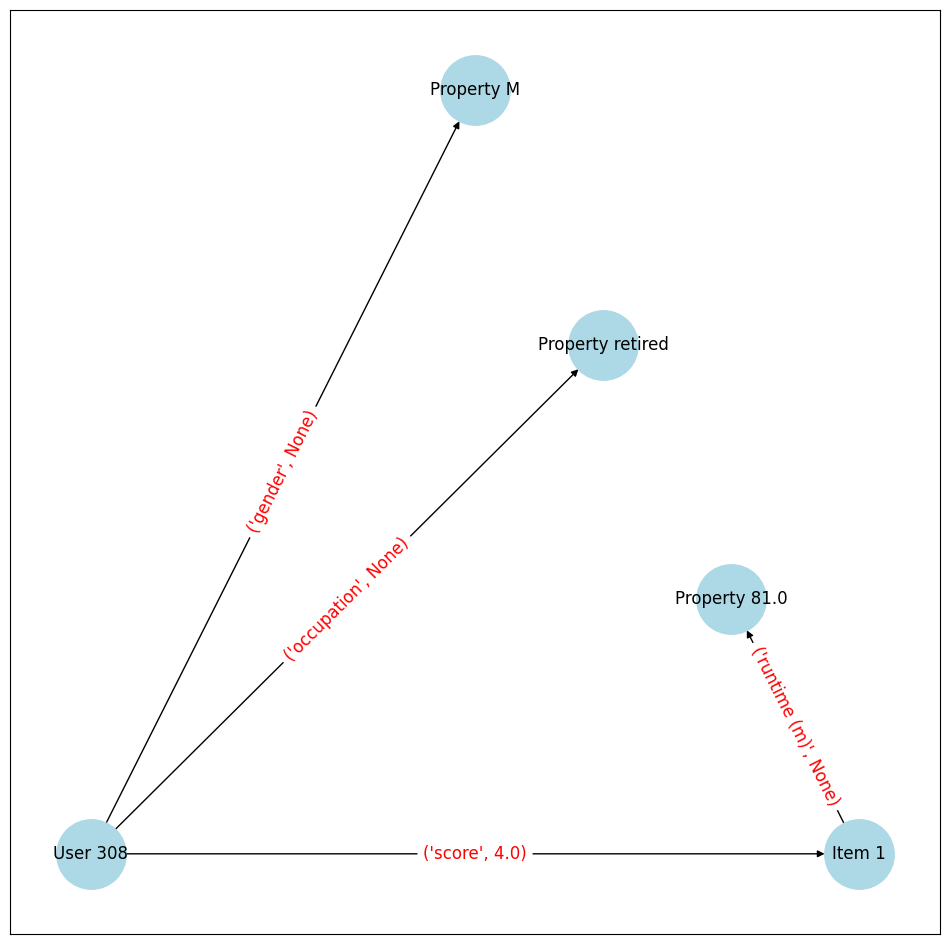

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# convert graph to networkx
networkx_graph = full_graph.to_networkx()

plt.figure(3,figsize=(12,12)) 
H = nx.subgraph(networkx_graph, [rs.ItemNode("1"), rs.PropertyNode("81.0"),
                                 rs.UserNode("308"), rs.PropertyNode("retired"),
                                 rs.PropertyNode("M")])

pos = nx.planar_layout(H)

nx.draw_networkx(H, with_labels=True, font_weight='light', node_color='lightblue', node_size=2500, pos=pos)

edge_labels = dict([((n1, n2), (d['label'], d.get('weight')))
                    for n1, n2, d in H.edges(data=True)])

nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels,
                             font_color='red', font_size=12, font_weight='normal')

plt.show()

As you can see each link between nodes has two *attributes* wrapped in a tuple:
* The first element is the ***label*** of the link
* The second element is the ***weight*** of the link

In our case only links between users and items have a weight associated to them
* This behaviour can be easily modified when adding new links

The Recommender System also needs an algorithm for ranking or predicting items to users. In the following example we use the **Personalized PageRank** algorithm.


In [24]:
pr = rs.NXPageRank(personalized=True)

The Graph Based Recommender System only needs the recommendation algorithm and the graph. No contents directory is required.

In [25]:
gbrs = rs.GraphBasedRS(pr, full_graph)

It is possible to provide recommendations as a ranked list for a single user:

In [26]:
# original ratings as test set since it makes no difference in this case:
# with methodology=None all unrated items for user u3 will be computed 
# except those present in its profile
rank = gbrs.rank(ratings, user_id_list=['3'], n_recs=10, methodology=None)

Computing rank for user 3:  100%|██████████| 1/1 [00:02<00:00]


In [27]:
print(rank)

  user_id item_id     score
0       3     286  0.000102
1       3      50  0.000096
2       3     313  0.000084
3       3     100  0.000082
4       3     269  0.000074
5       3     127  0.000068
6       3       1  0.000068
7       3     748  0.000059
8       3     237  0.000058
9       3     121  0.000054


It is also possible to provide recommendations for a list of users:

In [28]:
# original ratings as test set since it makes no difference in this case:
# with methodology=None all unrated items for user u3 will be computed 
# except those present in its profile
multiple_rank = gbrs.rank(ratings, user_id_list=['8', '2', '1'], n_recs=10,
                          methodology=None)

Computing rank for user 1:  100%|██████████| 3/3 [00:03<00:00]


In [29]:
print(multiple_rank)

   user_id item_id     score
0        8     286  0.000103
1        8     300  0.000094
2        8     288  0.000089
3        8     313  0.000085
4        8     100  0.000082
5        8     269  0.000075
6        8     302  0.000072
7        8       1  0.000068
8        8     328  0.000062
9        8     748  0.000060
10       2     181  0.000082
11       2     328  0.000067
12       2     748  0.000064
13       2     333  0.000059
14       2     121  0.000059
15       2       7  0.000059
16       2     117  0.000058
17       2     268  0.000057
18       2     174  0.000057
19       2     222  0.000057
20       1     286  0.000108
21       1     300  0.000098
22       1     288  0.000093
23       1     294  0.000089
24       1     313  0.000089
25       1     302  0.000075
26       1     328  0.000065
27       1     748  0.000063
28       1     333  0.000058
29       1     289  0.000052


Now let's build the ranking list for each user with two different methodologies:

> For each target user **u**, the following 4 different methodologies are available for defining those lists:
1.   **TestRatings** (default): the list of items to be evaluated consists of items rated by u in the test set
2.   **TestItems**: every item in the test set of every user except those in the training set of the target user will be predicted
3.   **TrainingItems**: every item in the training set of every user will be predicted except those in the training set of the target user
4.   **AllItems**: the whole set of items, except those in the training set of the target user, will be predicted

More information on [this paper](https://repositorio.uam.es/bitstream/handle/10486/665121/precision-oriented_bellogin_recsys_2011_ps.pdf;jsessionid=85982302D4DA9FF4DD7F21E4AC4F3391?sequence=1).

In our example we test the **first** and **third** methodology.

So we first split the original ratings with **HoldOut** method:
*   The output of the partition module are two lists. One containing one train set (in this case), the other containing one test set (in this case)

In [30]:
# by default train_set_size = 0.8
train_list, test_list = rs.HoldOutPartitioning(shuffle=False, random_state=42).split_all(ratings)

Performing HoldOutPartitioning:  100%|██████████| 943/943 [00:00<00:00]


Then we save in two different lists the ranking computed using the two different methodologies:
* `result_list_testratings` will contain ranking computed using ***TestRatings*** methodology
* `result_list_trainitems` will contain ranking computed using ***TrainingItems*** methodology

We will then evaluate them with the ***EvalModel*** class in the next chapter

In [31]:
result_list_testratings = []
result_list_trainitems = []

# holdout technique return only one split, but in general this works
# for all possible implemented partitioning techniques
for train, test in zip(train_list, test_list):

  full_graph = rs.NXFullGraph(ratings,
                            user_contents_dir='users_codified/',
                            item_contents_dir='movies_codified/',
                            user_exo_properties={0}, # Since no custom id given
                            item_exo_properties={'dbpedia'},
                            link_label='score')

  # remove interactions that appear in test set from the graph
  for user_id, item_id in zip(test.user_id_column, test.item_id_column):
    user_node = rs.UserNode(user_id)
    item_node = rs.ItemNode(item_id)

    full_graph.remove_link(user_node, item_node)

  alg = rs.NXPageRank(personalized=True)
  gbrs = rs.GraphBasedRS(alg, full_graph)

  # n_recs=None to produce a rank score for ALL candidate items<
  rank_testrat = gbrs.rank(test, n_recs=None)
  # by default testratings methodology
  rank_trainitems = gbrs.rank(test, n_recs=None, methodology=rs.TrainingItemsMethodology())

  result_list_testratings.append(rank_testrat)
  result_list_trainitems.append(rank_trainitems)

Creating User->Item links:  100%|██████████| 79619/79619 [00:01<00:00]
INFO - Loading contents from disk...
Creating Node->Properties links:  100%|██████████| 1643/1643 [00:00<00:00]
INFO - Loading contents from disk...
Computing rank for user 638:  100%|██████████| 943/943 [15:49<00:00]


# Evaluation module

Recommendations can be evaluated using several metrics. In the following example, we use:

*   ***Precision@10***
*   ***Prediction Coverage***
*   ***Gini Index***
*   ***DeltaGap***
*   ***Long Tail Distribution***
*   ***Profile vs Recommendations (Popularity comparison)***
*   ***Correlation between Popularity and Recommendation Frequency***

The last three metrics return *charts*.

The Evaluation module needs the following parameters:

*   A list of computed rank/predictions (in case multiple splits must be evaluated)
*   A list of truths (in case multiple splits must be evaluated)
*   List of metrics to compute

Obviously the list of computed rank/predictions and list of truths must have the same length, and the rank/prediction in position $i$ will be compared with the truth at position $i$

Since we computed ranking with the two different methodologies, we will evaluate them both

First let's evaluate the ranking computed with **TestRatings** methodology:

In [32]:
# we consider as the entire catalog every item that has
# been rated at least once by someone
catalog = set(ratings.item_id_column)

# TestRatings
em = eva.EvalModel(
    result_list_testratings,
    test_list,
    metric_list=[
                 eva.PrecisionAtK(k=10),
                 eva.PredictionCoverage(catalog),
                 eva.GiniIndex(),
                 eva.DeltaGap(user_groups={'very popular': 0.5,
                                           'quite popular': 0.3,
                                           'niche': 0.2},
                              user_profiles=train,
                              original_ratings=ratings),
                 eva.LongTailDistr(out_dir='test_ratings/'),
                 eva.PopRatioProfileVsRecs(user_groups={'very popular': 0.5,
                                                        'quite popular': 0.3,
                                                        'niche': 0.2},
                                           user_profiles=train,
                                           original_ratings=ratings,
                                           out_dir='test_ratings/'),
                 eva.PopRecsCorrelation(original_ratings=ratings,
                                        out_dir='test_ratings/')
                 ]
)

The fit() method returns two pandas DataFrame: the first one contains the metrics aggregated for the system, while the second contains the metrics computed for each user (where possible)

In [33]:
sys_result, users_result = em.fit()

INFO - Performing evaluation on metrics chosen
Performing PopRecsCorrelation:  100%|██████████| 7/7 [00:02<00:00]


In [34]:
sys_result

,Precision@10 - macro,PredictionCoverage,Gini,DeltaGap | very popular,DeltaGap | quite popular,DeltaGap | niche
user_id,,,,,,
sys - fold1,0.605813,82.28,0.566382,-0.016181,0.012483,0.059309
sys - mean,0.605813,82.28,0.566382,-0.016181,0.012483,0.059309


In [35]:
users_result

,Precision@10 - macro
user_id,
1,1.000000
10,0.500000
100,0.700000
101,0.800000
102,0.700000
...,...
95,0.800000
96,0.500000
97,0.500000


The following charts are generated:

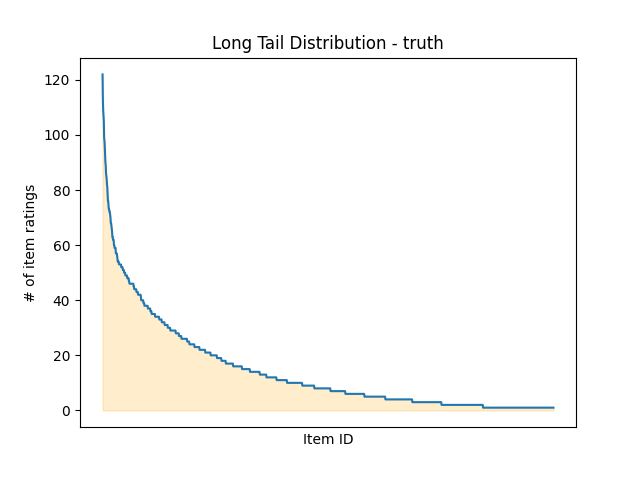

In [36]:
from IPython.display import Image
Image('test_ratings/long_tail_distr_truth.png')

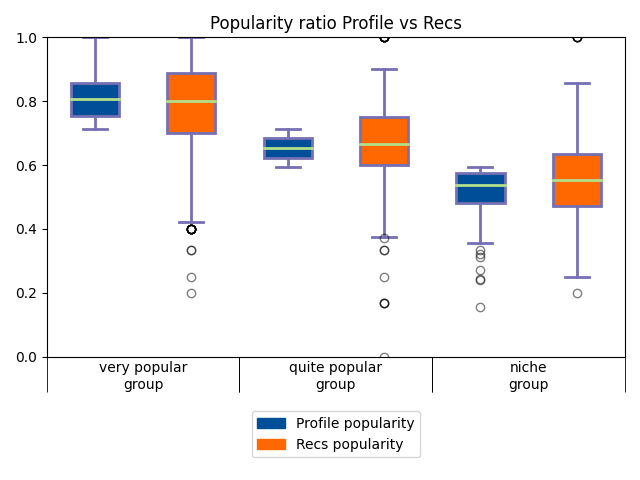

In [37]:
from IPython.display import Image
Image('test_ratings/pop_ratio_profile_vs_recs.png')

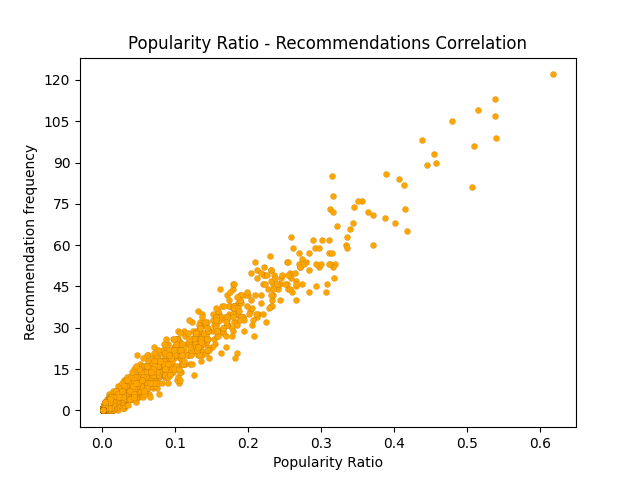

In [38]:
from IPython.display import Image
Image('test_ratings/pop_recs_correlation.png')

Now we evaluate the ranking computed with the **TrainingItems** methodology on the same metrics:

In [39]:
# we consider as the entire catalog every item that has
# been rated at least once by someone
catalog = set(ratings.item_id_column)

# TrainingItems
em = eva.EvalModel(
    result_list_trainitems,
    test_list,
    metric_list=[
                 eva.PrecisionAtK(k=10),
                 eva.PredictionCoverage(catalog),
                 eva.GiniIndex(),
                 eva.LongTailDistr(out_dir='train_items/'),
                 eva.DeltaGap(user_groups={'very popular': 0.5,
                                           'quite popular': 0.3,
                                           'niche': 0.2},
                              user_profiles=train,
                              original_ratings=ratings),
                 eva.PopRatioProfileVsRecs(user_groups={'very popular': 0.5,
                                                        'quite popular': 0.3,
                                                        'niche': 0.2},
                                           user_profiles=train,
                                           original_ratings=ratings,
                                           out_dir='train_items/'),
                 eva.PopRecsCorrelation(original_ratings=ratings,
                                        out_dir='train_items/')
                 ]
)

sys_result, users_result = em.fit()

INFO - Performing evaluation on metrics chosen
Performing PopRecsCorrelation:  100%|██████████| 7/7 [00:05<00:00]


We expect:
* A ***lower Precision*** since methodologies other than *TestRatings* are more truthful
* A **Gini index closer to 0** (more equality in the recommendation lists generated) since with methodologies other than *TestRatings* the items on which a rank score must be computed are almost equal accross all users
* **Higher Prediction Coverage** since simply more items must be ranked for each user w.r.t *TestRatings* methodology

In [40]:
sys_result

,Precision@10 - macro,PredictionCoverage,Gini,DeltaGap | very popular,DeltaGap | quite popular,DeltaGap | niche
user_id,,,,,,
sys - fold1,0.10965,97.68,0.033627,-0.745676,-0.69018,-0.619491
sys - mean,0.10965,97.68,0.033627,-0.745676,-0.69018,-0.619491


In [41]:
users_result

,Precision@10 - macro
user_id,
1,0.1
10,0.0
100,0.1
101,0.0
102,0.3
...,...
95,0.1
96,0.1
97,0.0


The following charts are generated:

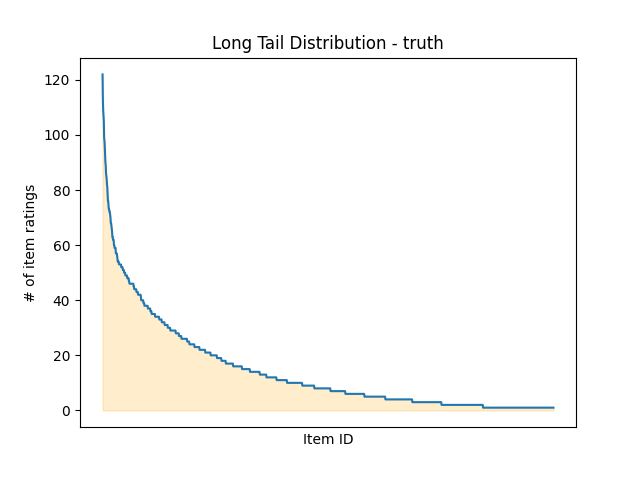

In [42]:
# Same as TestRatings methodology since the truth is the same
from IPython.display import Image
Image('train_items/long_tail_distr_truth.png')

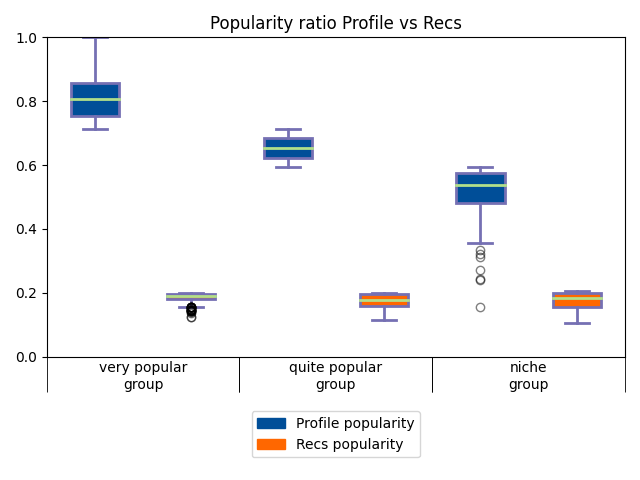

In [43]:
from IPython.display import Image
Image('train_items/pop_ratio_profile_vs_recs.png')

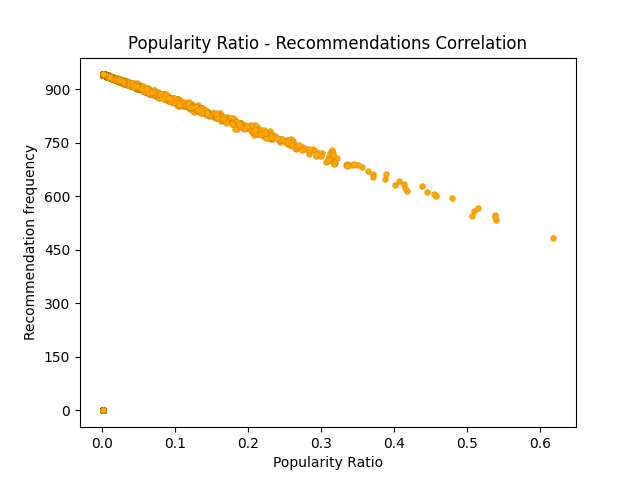

In [44]:
from IPython.display import Image
Image('train_items/pop_recs_correlation.png')